# Coursework 2
(core codebase to be imported as modules)

In [1]:
import numpy as np

from perceptron import Perceptron, KernelPerceptron
from kernels import polynomial_kernel, radial_basis_kernel
from utilities import train_test_split, data_split, y_encode

In [2]:
# Loading Data
data = np.loadtxt("dtrain123.dat")
y = data[:, 0]
X = data[:, 1:]

In [3]:
# Build test XOR dataset
a = np.array([[1,1], [-1,-1], [-1,1], [1,-1]])
b = np.array([1,1,-1,-1])

In [4]:
# Run for regular unkernalised perceptron
p = Perceptron()
p.train(a, b)
p.predict(a)

array([ 0.,  0.,  0.,  0.])

In [5]:
# Run for 2-order polynomial kernel
p_2 = KernelPerceptron(polynomial_kernel, 2)
p_2.train(a,b)
p_2.predict_proba(a)

array([ 4.,  4., -4., -4.])

In [6]:
p_2.gram

array([[4, 4, 0, 0],
       [4, 4, 0, 0],
       [0, 0, 4, 4],
       [0, 0, 4, 4]])

## Test for differentiating between 1s and 3s

In [7]:
idx = y!=2
X_z = X[idx,:]
y_z = y[idx]
y_z = (y_z == 1).astype(int) - (y_z == 3).astype(int)
n_1 = sum(y==1)
n_3 = sum(y==3)
print(n_1, n_3)

120 70


### Regular perceptron

In [8]:
p = Perceptron()
p.train(X_z, y_z)

In [10]:
p.predict(X_z).dot(y_z)/len(y_z)

1.0

In [11]:
p.predict(X_z).dot(y_z)

190.0

In [12]:
X_z.shape

(190, 256)

In [13]:
### Polynomial Kernel
for d in range(1,5):
    p_k = KernelPerceptron(kernel=polynomial_kernel, k_params=d)
    p_k.train(X_z, y_z)
    error = p_k.predict(X_z).dot(y_z)/len(y_z)
    print("{} : {}".format(d, error))

1 : 1.0
2 : 1.0
3 : 1.0
4 : 1.0


## DT's code

from utilities import preprocessing, train_test_split,y_encode,data_split

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

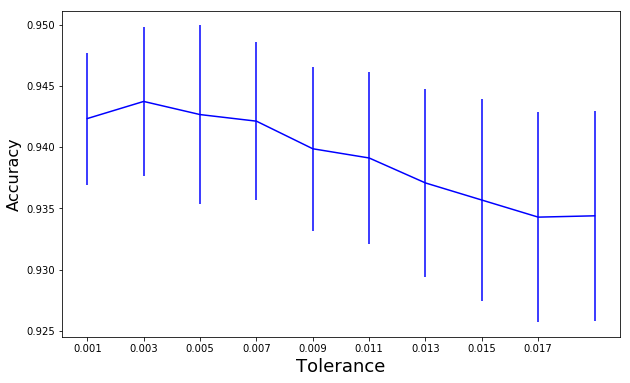

In [44]:
df = pd.read_csv('lr_tol_variable_selection.csv', header=None)
mean = df.mean(0)
std = df.std(0)
%matplotlib inline
fig = plt.figure(figsize=(10,6))
# plt.plot(range(1, 11)*0.001, mean)
x = [f*0.001 for f in range(1, 21, 2)]
plt.errorbar(x,mean,yerr=std, fmt='b')
plt.xlabel('Tolerance', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(np.arange(0.001, 0.019, 0.002));

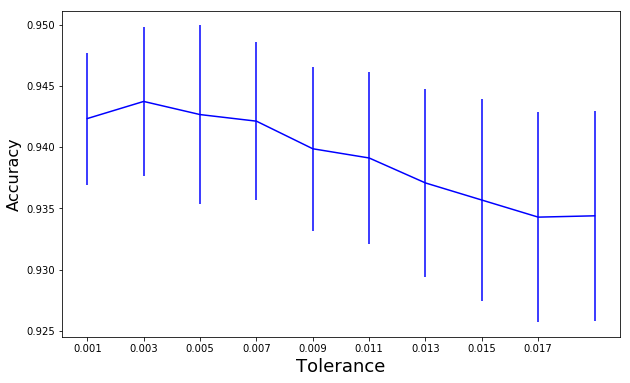

In [99]:
df = pd.read_csv('lr_tol_variable_selection.csv', header=None)
mean = df.mean(0)
std = df.std(0)
%matplotlib inline
fig = plt.figure(figsize=(10,6))
# plt.plot(range(1, 11)*0.001, mean)
x = [f*0.001 for f in range(1, 21, 2)]
plt.errorbar(x,mean,yerr=std, fmt='b')
plt.xlabel('Tolerance', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(np.arange(0.001, 0.019, 0.002));

In [107]:
# reg_list = [2**(-i) for i in range(1, 11)]
# header= ["log2(-{})".format(i) for i in range(1, 11)]
df = pd.read_csv('lr_reg_variable_selection.csv', header=None)

In [108]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.801755,0.865245,0.886679,0.897147,0.908439,0.917257,0.922922,0.924605,0.924531,0.924997,0.925140,0.925248,0.92489,0.924961
1,0.008421,0.010815,0.006369,0.008743,0.006601,0.006528,0.006508,0.006075,0.006350,0.006808,0.007197,0.007013,0.00662,0.006667


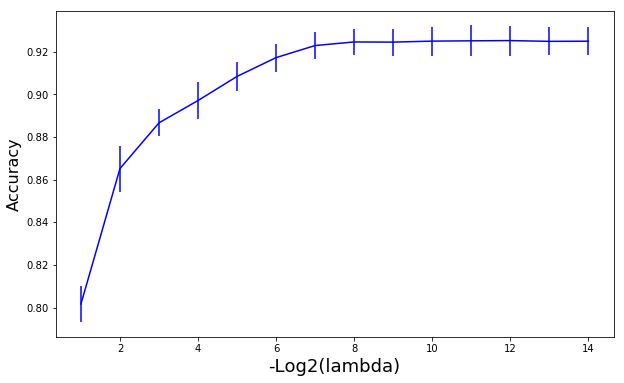

In [111]:
x = [i for i in range(1, 15)]
fig = plt.figure(figsize=(10,6))
plt.errorbar(x,df.iloc[0, :],yerr=df.iloc[1, :], fmt='b')
plt.xlabel('-Log2(lambda)', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)

In [97]:
z= np.zeros((3,3))

In [98]:
np.savetxt('test.csv', z, delimiter=',', fmt='%10.20f')

In [102]:
!ls -lt

total 39736
-rw-r--r--  1 danielmanela  staff      4228 16 Dec 19:45 main_lr_test.py
-rw-r--r--  1 danielmanela  staff      4830 16 Dec 19:44 lr_reg_variable_selection.csv
-rw-r--r--  1 danielmanela  staff     75940 16 Dec 19:36 exploratory_notebook.ipynb
-rw-r--r--  1 danielmanela  staff       207 16 Dec 19:35 test.csv
drwxr-xr-x  6 danielmanela  staff       192 16 Dec 19:13 __pycache__
-rw-r--r--  1 danielmanela  staff      3060 16 Dec 19:06 logistic_regression.py
-rw-r--r--  1 danielmanela  staff      1150 16 Dec 18:46 lr_tol_variable_selection_w_reg_0.1.csv
-rw-r--r--  1 danielmanela  staff      1150 16 Dec 18:26 lr_tol_variable_selection_w_reg_0.5.csv
-rw-r--r--  1 danielmanela  staff      1150 16 Dec 18:25 lr_tol_variable_selection_w_reg_0.0.csv
-rw-r--r--  1 danielmanela  staff      1150 16 Dec 18:24 lr_tol_variable_selection_w_reg_0.2.csv
-rw-r--r--  1 danielmanela  staff      1150 16 Dec 18:22 lr_tol_variable_selection_w_reg_1.csv
-rw-r--r--  1 danielmanela  staff      1150 16